# Car Price Prediction
#### Author - Praneesh Sharma

#### Importing Libraries

In [1]:
#for manipulating the dataset
import pandas as pd

#for working on the data
import numpy as np

#for data visualizations
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(7,5)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
#for making the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Importing the Dataset

In [3]:
data = pd.read_csv('CarPrice.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Exploratory Data Analysis

In [5]:
data.shape

(205, 26)

In [6]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no missing values in this dataset

In [7]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

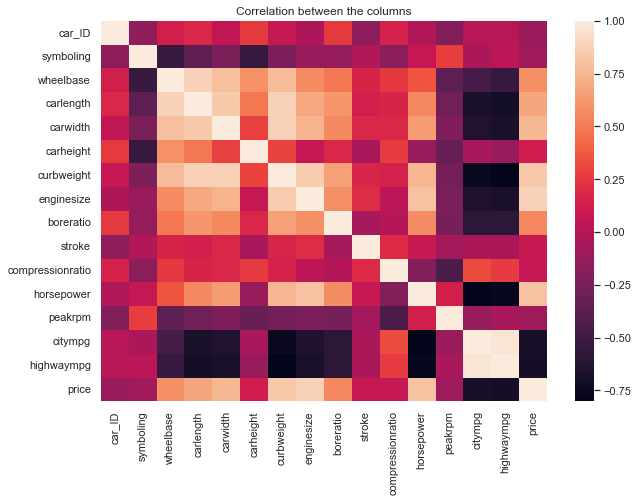

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=False)
plt.title('Correlation between the columns')
plt.show()

As seen from the correlation graph, price is highly related to citympg, highwaympg, enginesize and curbweight. Let's make a new dataframe with these columns

In [9]:
df = data[['enginesize','curbweight','citympg','highwaympg','price']].copy()
df.head()

,enginesize,curbweight,citympg,highwaympg,price
0,130,2548,21,27,13495.0
1,130,2548,21,27,16500.0
2,152,2823,19,26,16500.0
3,109,2337,24,30,13950.0
4,136,2824,18,22,17450.0


### Data Visualization

In [10]:
enginesize = df['enginesize']
curbweight = df['curbweight']
citympg = df['citympg']
highwaympg = df['highwaympg']
price = df['price']

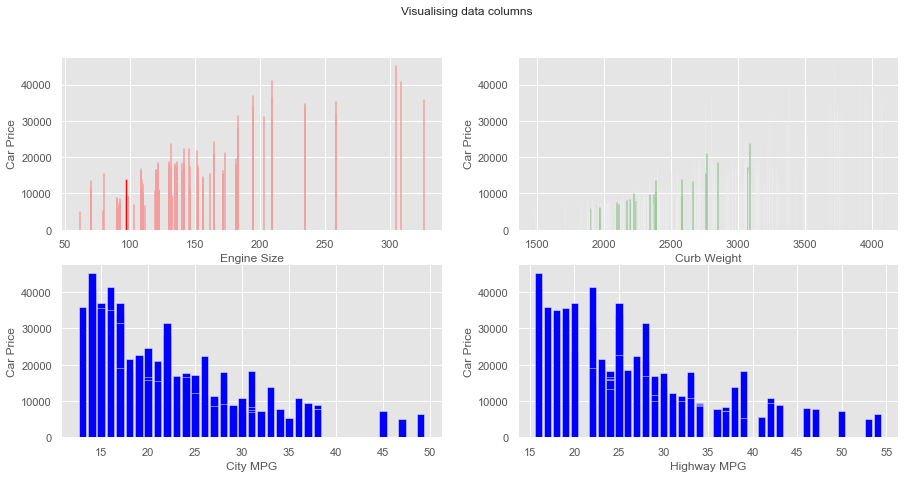

In [11]:
style.use('ggplot')
fig = plt.figure(figsize=(15,7))
fig.suptitle('Visualising data columns')
plt.subplot(2,2,1)
plt.bar(enginesize,price,color='red')
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.subplot(2,2,2)
plt.bar(curbweight,price,color='green')
plt.xlabel("Curb Weight")
plt.ylabel("Car Price")
plt.subplot(2,2,3)
plt.bar(citympg,price,color='blue')
plt.xlabel("City MPG")
plt.ylabel("Car Price")
plt.subplot(2,2,4)
plt.bar(highwaympg,price,color='blue')
plt.xlabel("Highway MPG")
plt.ylabel("Car Price")
plt.show()

### Model Training

In [12]:
#Convert pandas dataframe to numpy vector
df = df.to_numpy().astype(float)

X = df[:,0:4]
Y = df[:,4]

In [13]:
#Splitting trainig and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.10)

print('Shape of feature variables: ', X_train.shape)
print('Shape of target variable: ', Y_train.shape)

Shape of feature variables:  (184, 4)
Shape of target variable:  (184,)


In [14]:
#using linear regression to create the model
model = LinearRegression()

#fitting the training data in the model
model.fit(X_train, Y_train)

LinearRegression()

### Evaluating the model

In [20]:
#predicting on the test set
Y_pred = model.predict(X_test)
Y_pred_2 = model.predict(X_train)

In [21]:
from sklearn.metrics import r2_score

r2_score(Y_test, Y_pred)

0.6410526894781334

In [23]:
r2_score(Y_train, Y_pred_2)

0.8141943757674583